<a href="https://colab.research.google.com/github/Adlinnithisha/cardiovascular-disease/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

IMPORTING THE DATASET

In [ ]:
data=pd.read_csv('/content/CVD_cleaned.csv')
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


EXPLORATORY DATA ANALYSIS

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [ ]:
data.describe(include=object)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,5,5,2,2,2,2,2,4,2,2,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,183590


In [ ]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [ ]:
cat=list(data.select_dtypes(include='object').columns)
num=list(data.select_dtypes(exclude='object').columns)
print(f'Categorical columns: {cat}')
print(f'Numerical columns: {num}')

Categorical columns: ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']
Numerical columns: ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


In [ ]:
for column in cat:
  print(column)
  print(data[column].value_counts(),'\n')

General_Health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64 

Checkup
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64 

Exercise
Yes    239381
No      69473
Name: Exercise, dtype: int64 

Heart_Disease
No     283883
Yes     24971
Name: Heart_Disease, dtype: int64 

Skin_Cancer
No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64 

Other_Cancer
No     278976
Yes     29878
Name: Other_Cancer, dtype: int64 

Depression
No     246953
Yes     61901
Name: Depression, dtype: int64 

Diabetes
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64 

Arthritis
No     207

DATA TRANSFORMATION

In [ ]:
x={'Excellent':0,'Very Good':1,'Good':2,'Fair':3,'Poor':4}
data['General_Health']=data['General_Health'].map(x)
data['General_Health'].value_counts()

1    110395
2     95364
0     55954
3     35810
4     11331
Name: General_Health, dtype: int64

In [ ]:
data['Exercise']=data['Exercise'].replace({'Yes':1,'No':0})
data['Exercise'].value_counts()

1    239381
0     69473
Name: Exercise, dtype: int64

In [ ]:
data['Heart_Disease']=data['Heart_Disease'].replace({'Yes':1,'No':0})
data['Heart_Disease'].value_counts()

0    283883
1     24971
Name: Heart_Disease, dtype: int64

In [ ]:
data['Skin_Cancer']=data['Skin_Cancer'].replace({'Yes':1,'No':0})
data['Skin_Cancer'].value_counts()

0    278860
1     29994
Name: Skin_Cancer, dtype: int64

In [ ]:
data['Other_Cancer']=data['Other_Cancer'].replace({'Yes':1,'No':0})
data['Other_Cancer'].value_counts()

0    278976
1     29878
Name: Other_Cancer, dtype: int64

In [ ]:
data['Depression']=data['Depression'].replace({'Yes':1,'No':0})
data['Depression'].value_counts()

0    246953
1     61901
Name: Depression, dtype: int64

In [ ]:
data['Arthritis']=data['Arthritis'].replace({'Yes':1,'No':0})
data['Arthritis'].value_counts()

0    207783
1    101071
Name: Arthritis, dtype: int64

In [ ]:
data['Smoking_History']=data['Smoking_History'].replace({'Yes':1,'No':0})
data['Smoking_History'].value_counts()

0    183590
1    125264
Name: Smoking_History, dtype: int64

In [ ]:
data['Sex']=data['Sex'].replace({'Female':1,'Male':0})
data['Sex'].value_counts()

1    160196
0    148658
Name: Sex, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Age_Category']=encoder.fit_transform(data['Age_Category'])
data['Diabetes']=encoder.fit_transform(data['Diabetes'])
data['Checkup']=encoder.fit_transform(data['Checkup'])
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,4,2,0,0,0,0,0,0,1,1,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,1,4,0,1,0,0,0,2,0,1,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,1,4,1,0,0,0,0,2,0,1,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,4,4,1,1,0,0,0,2,0,0,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,0,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


DATA VISUALIZATION

Height_(cm)
Skew : 0.02


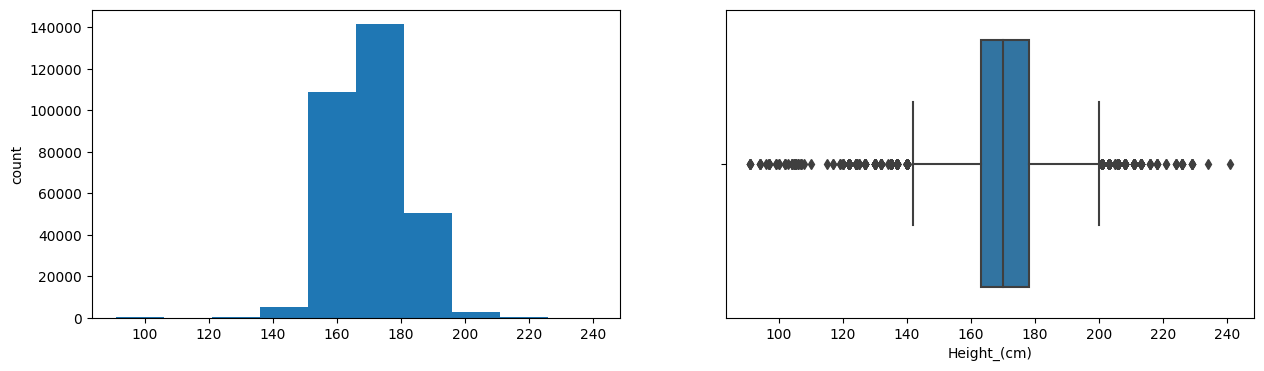

Weight_(kg)
Skew : 1.06


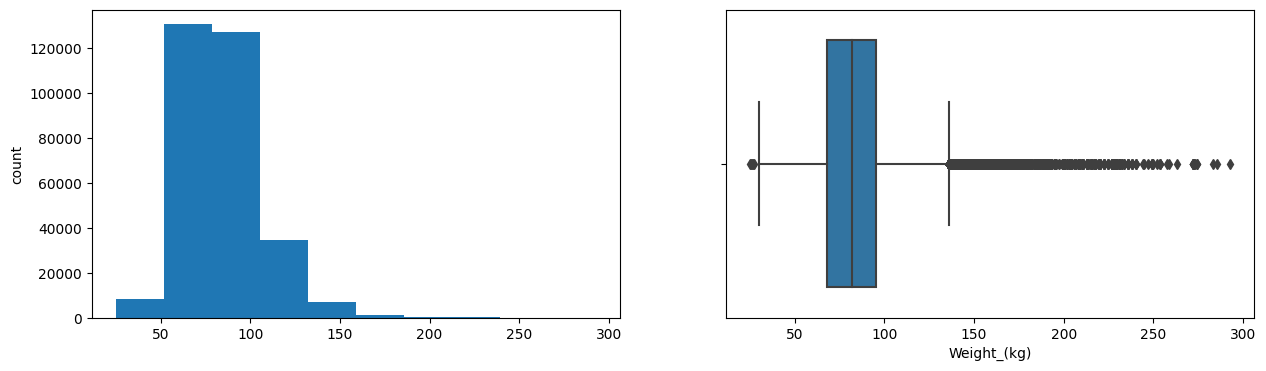

BMI
Skew : 1.38


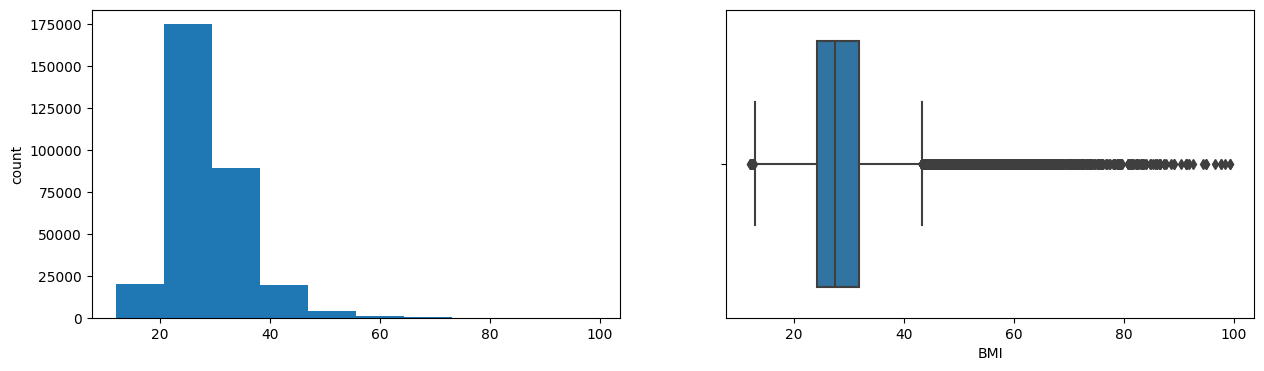

Alcohol_Consumption
Skew : 1.89


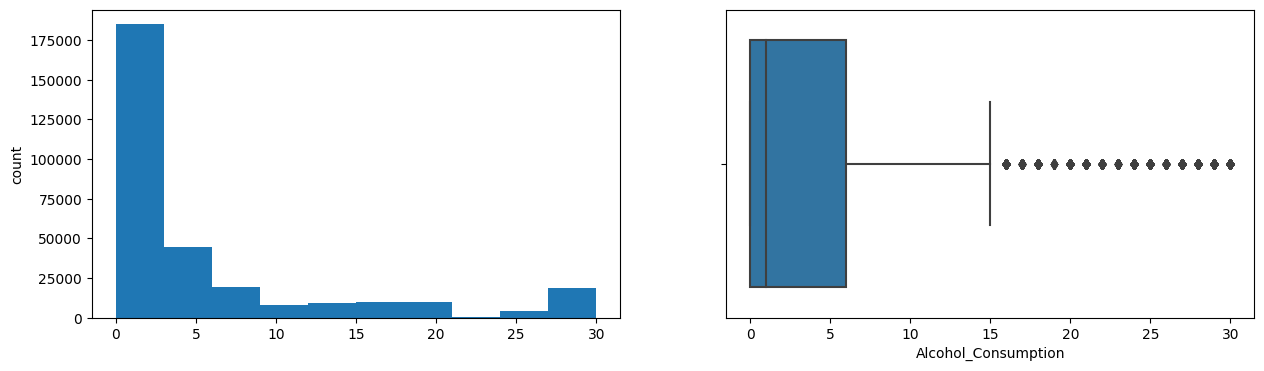

Fruit_Consumption
Skew : 1.25


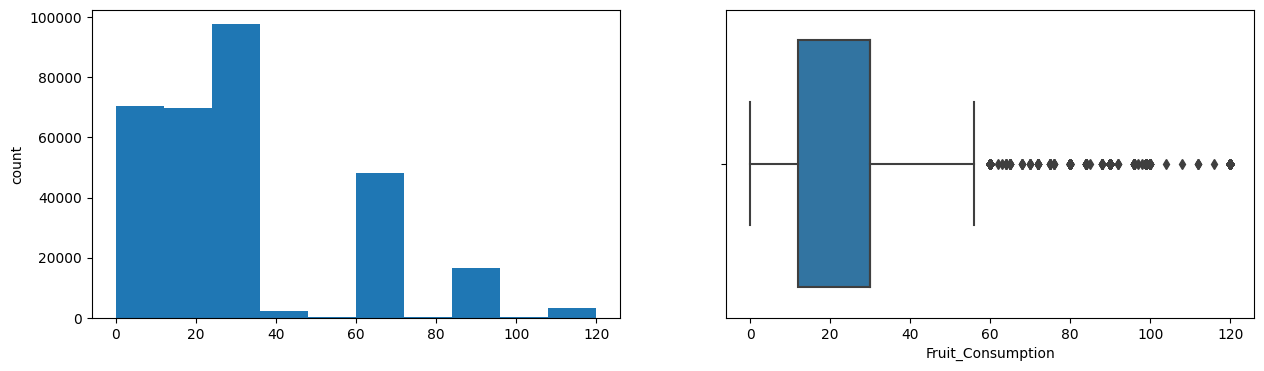

Green_Vegetables_Consumption
Skew : 2.42


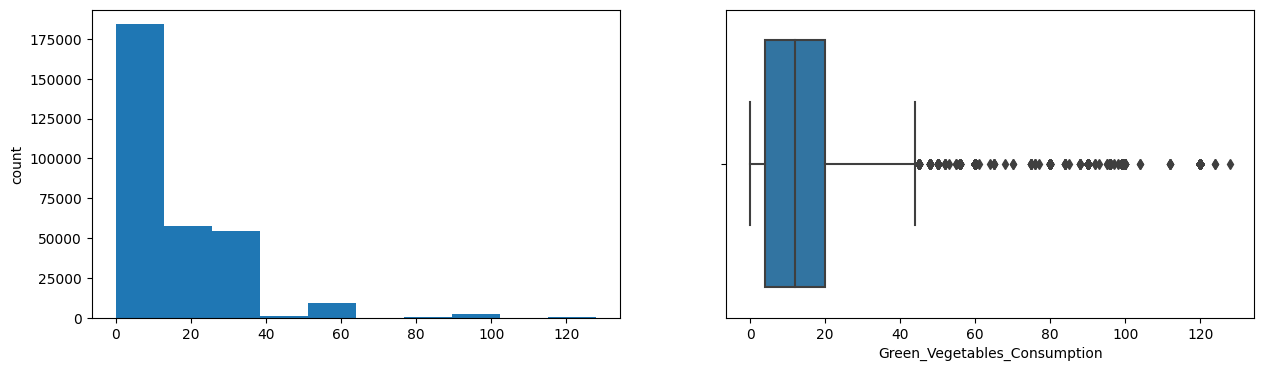

FriedPotato_Consumption
Skew : 4.91


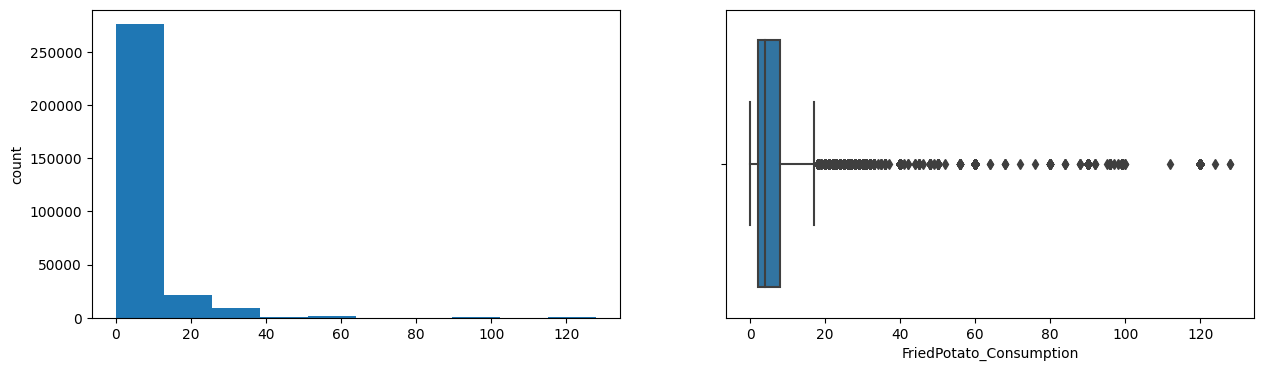

In [ ]:
#univariate analysis numerical column
for col in num:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

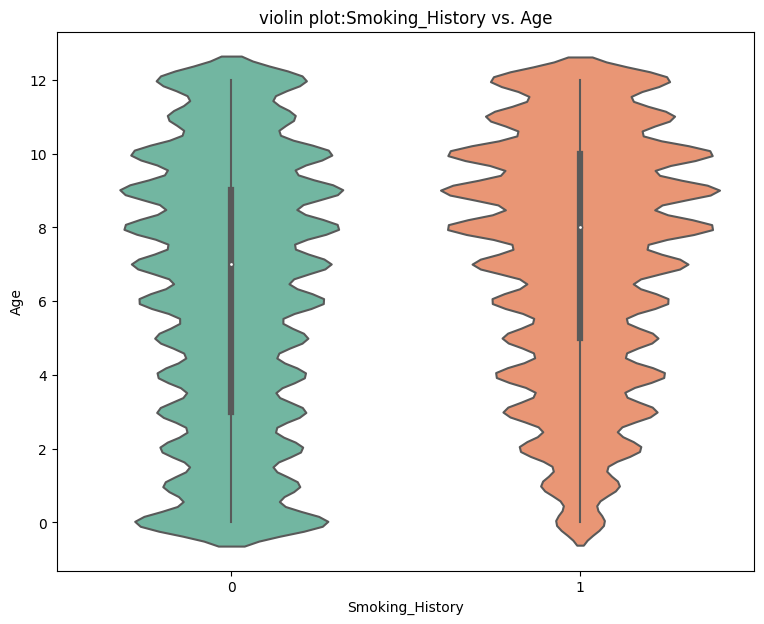

In [ ]:
plt.figure(figsize=(9,7))
sns.violinplot(data=data,x='Smoking_History',y='Age_Category',palette='Set2')
plt.title('violin plot:Smoking_History vs. Age')
plt.xlabel('Smoking_History')
plt.ylabel('Age')
plt.show()

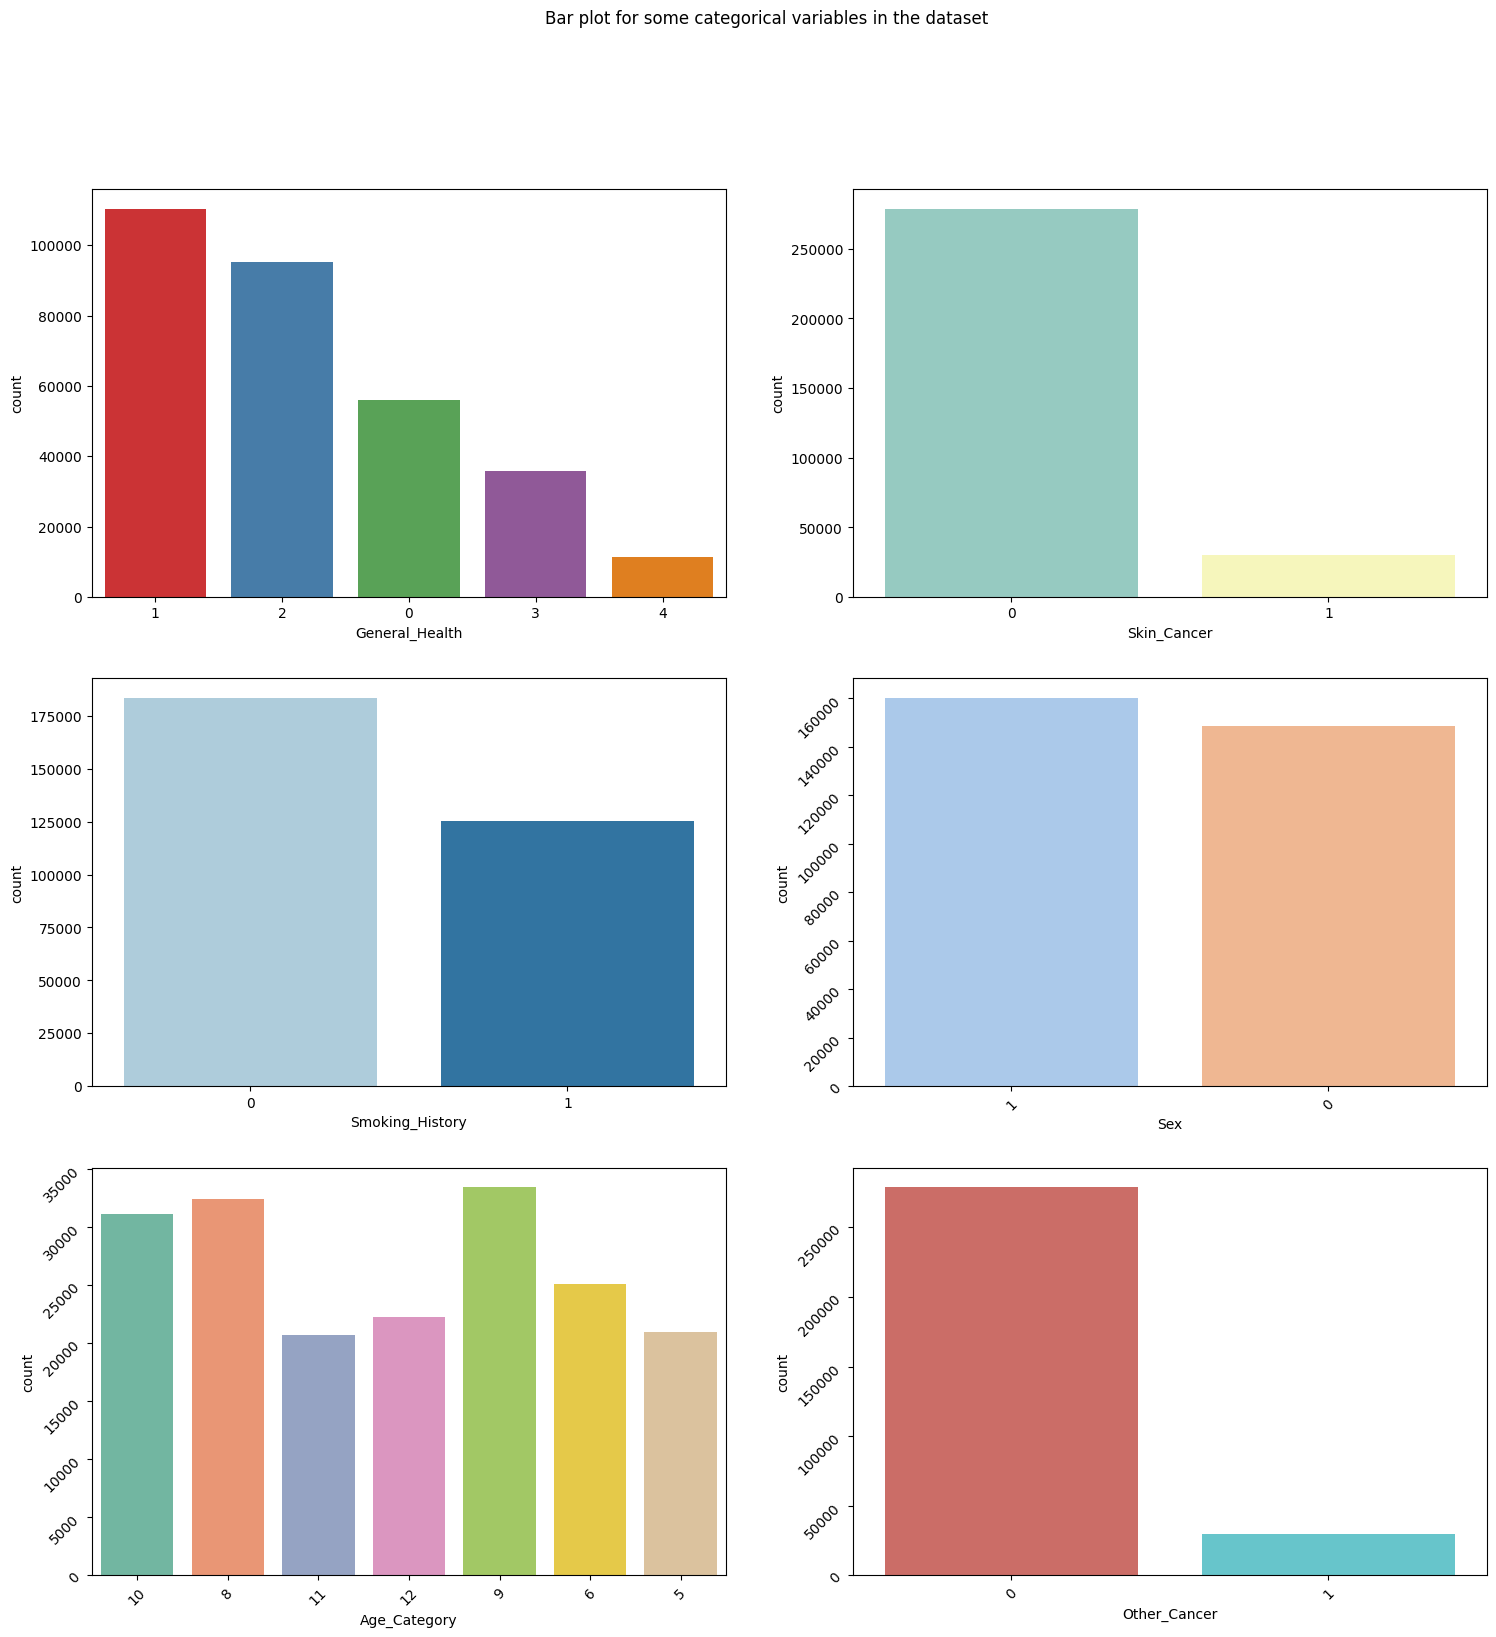

In [ ]:
#univariate analysis for some catogorical variable
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for some categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'General_Health', data = data, palette='Set1',
              order = data['General_Health'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Skin_Cancer', data = data, palette='Set3',
              order = data['Skin_Cancer'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Smoking_History', data = data, palette='Paired',
              order = data['Smoking_History'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Sex', data = data, palette='pastel',
              order = data['Sex'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Age_Category', data = data, palette='Set2',
              order = data['Age_Category'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Other_Cancer', data = data, palette='hls',
              order = data['Other_Cancer'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45)
axes[2][0].tick_params(labelrotation=45)
axes[2][1].tick_params(labelrotation=45)

<ipython-input-79-f3a504515573>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=data.corr()


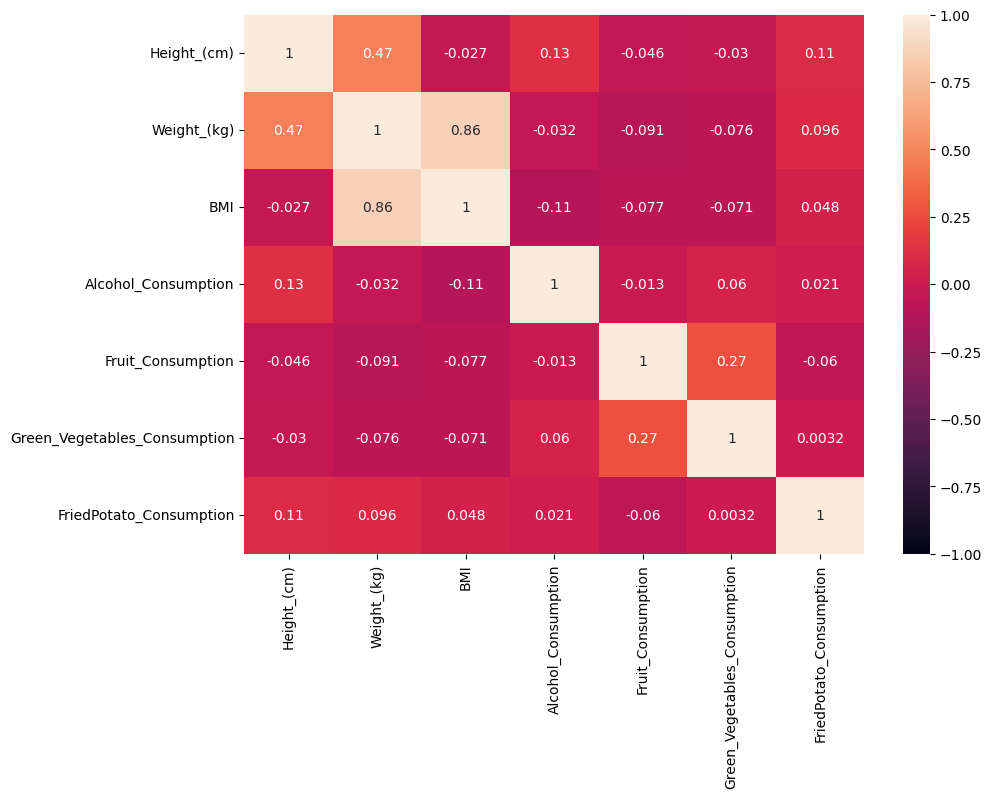

In [ ]:
plt.figure(figsize=(10, 7))
data=data.corr()
sns.heatmap(data=data, annot = True, vmin = -1, vmax = 1)
plt.show()

SPLITTING DATA INTO TRAINING AND TEST SET

In [ ]:
x=data.drop(columns=['Heart_Disease'])
y=data['Heart_Disease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x.shape)
print(y.shape)

(308854, 18)
(308854,)


DATA BALANCING

In [ ]:
print('Target variable(Heart_Disease) count')
y_train.value_counts()

Target variable(Heart_Disease) count


0    227100
1     19983
Name: Heart_Disease, dtype: int64

In [ ]:
smote=SMOTE(random_state=42)
x_balanced, y_balanced= smote.fit_resample(x,y)

In [ ]:
y_balanced.value_counts()

0    283883
1    283883
Name: Heart_Disease, dtype: int64

FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

DATA MODELLING

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)
lr_pred=lr.predict(x_test_scaled)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train)
dt_pred=dt.predict(x_test_scaled)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
rf_pred=rf.predict(x_test_scaled)

MODEL EVALUATION

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score of linear regression:', accuracy_score(y_test,lr_pred))
print('Accuracy score of decision tree classifier:', accuracy_score(y_test,dt_pred))
print('Accuracy score of random forest classifier:', accuracy_score(y_test,rf_pred))

Accuracy score of linear regression: 0.91942821064901
Accuracy score of decision tree classifier: 0.8617636107558563
Accuracy score of random forest classifier: 0.9183435592753881


In [ ]:
from sklearn.metrics import precision_score
print('Precision score of linear regression model:',precision_score(y_test,lr_pred))
print('Precision score of desicion tree classsifier:',precision_score(y_test,dt_pred))
print('Precision score of random forest classifier:',precision_score(y_test,rf_pred))

Precision score of linear regression model: 0.5091819699499165
Precision score of desicion tree classsifier: 0.19487884516239903
Precision score of random forest classifier: 0.44142259414225943


In [ ]:
from sklearn.metrics import recall_score
print('Recall score of linear regression model:',recall_score(y_test,lr_pred))
print('Recall score of desicion tree classifier:',recall_score(y_test,dt_pred))
print('Recall score of random forest classifier:',recall_score(y_test,rf_pred))

Recall score of linear regression model: 0.061146752205292705
Recall score of desicion tree classifier: 0.227345629510826
Recall score of random forest classifier: 0.042301523656776266


In [ ]:
from sklearn.metrics import f1_score
print('F1 score of linear regression model:',f1_score(y_test,lr_pred))
print('F1 score of decison tree classifier:',f1_score(y_test,dt_pred))
print('F1 score of random forest classifier:',f1_score(y_test,rf_pred))

F1 score of linear regression model: 0.10918202971183102
F1 score of decison tree classifier: 0.20986397705191082
F1 score of random forest classifier: 0.07720453713867545


In [ ]:
from tabulate import tabulate
lr_result=['Linear regression',accuracy_score(y_test,lr_pred),
           precision_score(y_test,lr_pred),recall_score(y_test,lr_pred),
           f1_score(y_test,lr_pred)]
dt_result=['Decision tree',accuracy_score(y_test,dt_pred),
           precision_score(y_test,dt_pred),recall_score(y_test,dt_pred),
           f1_score(y_test,dt_pred)]
rf_result=['Random forest',accuracy_score(y_test,rf_pred),
           precision_score(y_test,rf_pred),recall_score(y_test,rf_pred),
           f1_score(y_test,rf_pred)]
table=tabulate([lr_result,dt_result,rf_result],headers=['Model','Accuracy','Precision','Recall','F1 score'],tablefmt='grid')
print(table)

+-------------------+------------+-------------+-----------+------------+
| Model             |   Accuracy |   Precision |    Recall |   F1 score |
+===================+============+=============+===========+============+
| Linear regression |   0.919428 |    0.509182 | 0.0611468 |  0.109182  |
+-------------------+------------+-------------+-----------+------------+
| Decision tree     |   0.861764 |    0.194879 | 0.227346  |  0.209864  |
+-------------------+------------+-------------+-----------+------------+
| Random forest     |   0.918344 |    0.441423 | 0.0423015 |  0.0772045 |
+-------------------+------------+-------------+-----------+------------+
